In [1]:
import pandas as pd
import numpy as np

In [2]:
credits_df = pd.read_csv("tmdb_5000_credits.csv")
movies_df = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
#Le fichier "movies" contient des informations telles que le nom et l'identifiant du film, le budget, les langues 
#dans lesquelles le film a été diffusé, etc.

movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
#Le fichier "credits" contient toutes les informations métadonnées sur le film

credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
#### renommer les colonnes du DataFrame credits_df .

credits_df.columns = ['id','title','cast','crew']

#fusionner les DataFrames movies_df et credits_df en utilisant les colonnes 'id' et 'title' comme clés de jointure.
movies_df = movies_df.merge(credits_df, on=['id','title'])

In [6]:
#afficher le type de l'élément à l'index 0 de cette colonne.
features = ["cast", "crew", "keywords", "genres"]
for feature in features:
    print(type(movies_df[feature][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [7]:
#évaluer le contenu des colonnes spécifiées dans la liste "features" en tant que types Python appropriés.
from ast import literal_eval

for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)

movies_df[features].head(10)

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
5,"[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...","[{'id': 851, 'name': 'dual identity'}, {'id': ...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na..."
6,"[{'cast_id': 34, 'character': 'Flynn Rider (vo...","[{'credit_id': '52fe46db9251416c91062101', 'de...","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...","[{'id': 16, 'name': 'Animation'}, {'id': 10751..."
7,"[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...","[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
8,"[{'cast_id': 3, 'character': 'Harry Potter', '...","[{'credit_id': '52fe4273c3a36847f801fab1', 'de...","[{'id': 616, 'name': 'witch'}, {'id': 2343, 'n...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
9,"[{'cast_id': 18, 'character': 'Bruce Wayne / B...","[{'credit_id': '553bf23692514135c8002886', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 7002...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [8]:
def Title(x):
    return x.title()

movies_df["title"] = movies_df["title"].apply(Title)

In [9]:
#pour extraire des données spécifiques d'une structure de données complexe

    #obtenir le nom du réalisateur d'un film
def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan #It represents an undefined or missing value.

    #obtenir une liste de noms à partir d'une liste de dictionnaires
def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]

        if len(names) > 3:
            names = names[:3]#just three first names found

        return names

    return []

In [10]:
#appliquer les deux fonctions
    #créer une nouvelle colonne "director" dans le DataFrame
movies_df["director"] = movies_df["crew"].apply(get_director)

    #extraire une liste de noms pour chaque colonne spécifiée 
    #dans features et de mettre à jour les valeurs de ces colonnes dans le DataFrame.
features = ["cast", "keywords", "genres"]
for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head()


,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates Of The Caribbean: At World'S End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [11]:
#nettoyer les données dans ces colonnes en transformant les valeurs en minuscules et en supprimant les espaces. 
def clean_data(row):
    if isinstance(row, list):
        return [str.lower(i.replace(" ", "")) for i in row]
    else:
        if isinstance(row, str):
            return str.lower(row.replace(" ", ""))
        else:
            return ""

features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [12]:
#combiner les caractéristiques d'un film en une représentation textuelle appelée "soup". 
def create_soup(features):
    return ' '.join(features['keywords']) + ' ' + ' '.join(features['cast']) + ' ' + features['director'] + ' ' + ' '.join(features['genres'])

#créer une nouvelle colonne "soup" contenant la représentation textuelle combinée des caractéristiques pour chaque film.
movies_df["soup"] = movies_df.apply(create_soup, axis=1)
print(movies_df["soup"].head())

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object


In [13]:
#sauvegarder les données prétraitées du DataFrame movies_df dans un fichier CSV 
csv_file_path = 'tmdb.csv'

movies_df.to_csv(csv_file_path, index=False)

print(f"Data saved to '{csv_file_path}' successfully.")

##Preparation des donnees FIN

Data saved to 'tmdb.csv' successfully.


In [14]:
#Appliquer méthode TF-IDF pour transformer les mots clés de chaque film  en matrice de vecteurs.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df["soup"])


In [15]:
# Calculer la matrice de similarité en calculant chaque cosinus similarité entre tout les films 2 à 2.

cosine_sim2 = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim2.shape)

movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

(4803, 4803)


In [16]:
#Create a reverse mapping of movie titles to indices and convert it to lowercase
indices = pd.Series(movies_df.index, index=movies_df["title"].apply(str.lower)).drop_duplicates()

print(indices.head())

title
avatar                                      0
pirates of the caribbean: at world's end    1
spectre                                     2
the dark knight rises                       3
john carter                                 4
dtype: int64


In [17]:
#The get_recommendations() function , and plot the result
def get_recommendations(title, cosine_sim):
    title=title.lower()
    idx = indices[title]
    similarity_scores = list(enumerate(cosine_sim[idx])) #the first element is the index of a movie and the second element is the corresponding cosine similarity score.
    similarity_scores= sorted(similarity_scores, key=lambda x: x[1], reverse=True)#sorts the similarity_scores list in descending order based on the second element of each tuple (the similarity score) 
    similarity_scores= similarity_scores[1:11]
    # (a, b) where a is id of movie, b is similarity_scores
    
    movies_indices = [ind[0] for ind in similarity_scores]
    movies = movies_df["title"].iloc[movies_indices] 
    sim_array=[i[1] for i in similarity_scores]
    
    return movies


print("################ Content Based System #############")
print("Recommendations for The Dark Knight Rises")
print(get_recommendations("The Dark Knight Rises", cosine_sim2))
print()
print("Recommendations for Avengers")
print(get_recommendations("The Avengers", cosine_sim2))

################ Content Based System #############
Recommendations for The Dark Knight Rises
65               The Dark Knight
119                Batman Begins
1196                The Prestige
4638    Amidst The Devil'S Wings
2793        The Killer Inside Me
1033                    Insomnia
95                  Interstellar
1775               The Statement
96                     Inception
739            London Has Fallen
Name: title, dtype: object

Recommendations for Avengers
7                   Avengers: Age Of Ultron
26               Captain America: Civil War
85      Captain America: The Winter Soldier
79                               Iron Man 2
169      Captain America: The First Avenger
174                     The Incredible Hulk
421                                  Zodiac
1294                               Serenity
1382                                   Tmnt
4129                                 London
Name: title, dtype: object


################ Content Based System #############
Recommendations for The Dark Knight Rises


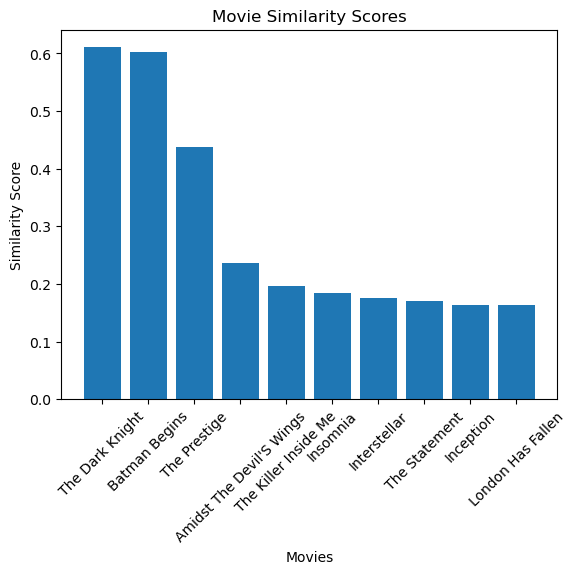

None



In [18]:
import matplotlib.pyplot as plt

def get_plot(title, cosine_sim):
    title = title.lower()
    idx = indices[title]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:11]

    movie_indices = [ind[0] for ind in similarity_scores]
    movie_names = movies_df["title"].iloc[movie_indices].tolist()
    similarity_scores = [ind[1] for ind in similarity_scores]

    # Plotting the movie names and similarity scores
    plt.bar(movie_names, similarity_scores)
    plt.xlabel('Movies')
    plt.ylabel('Similarity Score')
    plt.title('Movie Similarity Scores')
    plt.xticks(rotation=45)
    plt.show()
    
print("################ Content Based System #############")
print("Recommendations for The Dark Knight Rises")
print(get_plot("The Dark Knight Rises", cosine_sim2))
print()